In [1]:
from ctalearn.image_mapping import *

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
%%time
test_mapper = ImageMapper()



/Users/qifeng/Data/deep-learning-CTA/ctalearn/image_mapping.py:261: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  table[x][y] = j
/Users/qifeng/Data/deep-learning-CTA/ctalearn/image_mapping.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mapping_matrix[i + 1, y_S:y_L + 1, x_S:x_L + 1] = pixel_weight


CPU times: user 2.16 s, sys: 285 ms, total: 2.45 s
Wall time: 1.35 s


In [3]:
%%time
test_pix_valsV = np.arange(500) #first 0 is for padding, then 499 pix vals
test_imV = test_mapper.map_image(test_pix_valsV, 'VTS')

CPU times: user 473 µs, sys: 173 µs, total: 646 µs
Wall time: 481 µs


//anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


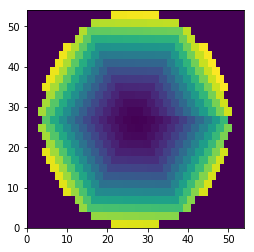

In [4]:
plt.pcolor(test_imV[:,:,0])
plt.axes().set_aspect('equal')

In [5]:
%%time
test_imS = test_mapper.map_image(np.arange(0,11329,1), 'MSTS')

CPU times: user 263 µs, sys: 121 µs, total: 384 µs
Wall time: 275 µs


//anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


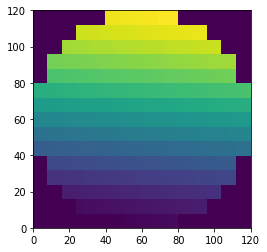

In [6]:
plt.pcolor(test_imS[:,:, 0])
plt.axes().set_aspect('equal')


In [7]:
test_im_dict = {}
#for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'SSTC', 'SSTA']:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS']:
    print(tel_)
    %%time
    test_im_dict[tel_] = test_mapper.map_image(np.concatenate([[0], 
                                                               200+np.arange(0,test_mapper.num_pixels[tel_],1)]), tel_)

LST
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
MSTN
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs
SST1
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
MSTF
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
MSTS
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs
SSTC
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
SSTA
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
VTS
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


LST


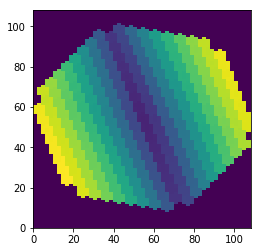

MSTN


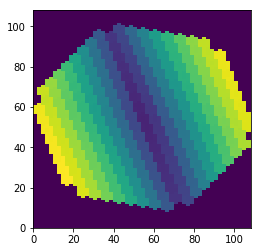

SST1


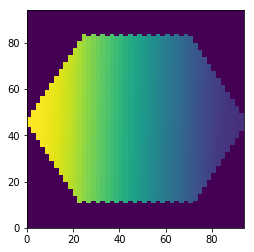

MSTF


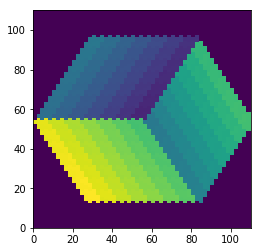

MSTS


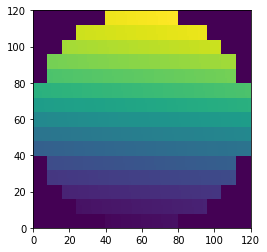

SSTC


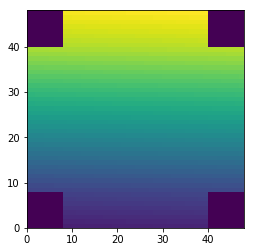

SSTA


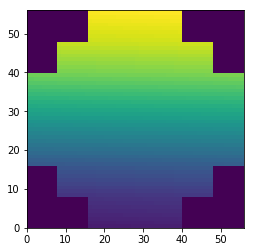

VTS


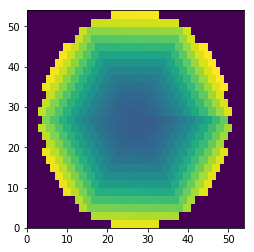

In [8]:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS']:
    print(tel_)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(test_im_dict[tel_][:,:,0],cmap='viridis')
    plt.savefig("{}_mapped.pdf".format(tel_))
    plt.show()




In [9]:
%%time
test_mapper_pad = ImageMapper(padding = {
                    'MSTS': 10,
                    'VTS': 10,
                    'MSTF': 10,
                    'MSTN': 20,
                    'LST': 10,
                    'SST1': 10,
                    'SSTC': 10,
                    'SSTA': 10
                    })



/Users/qifeng/Data/deep-learning-CTA/ctalearn/image_mapping.py:261: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  table[x][y] = j
/Users/qifeng/Data/deep-learning-CTA/ctalearn/image_mapping.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mapping_matrix[i + 1, y_S:y_L + 1, x_S:x_L + 1] = pixel_weight


CPU times: user 2.72 s, sys: 500 ms, total: 3.22 s
Wall time: 2.14 s


In [10]:
test_im_dict = {}
#for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'SSTC', 'SSTA']:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS']:
    print(tel_)
    %%time
    test_im_dict[tel_] = test_mapper_pad.map_image(np.concatenate([[0], 
                                                   200+np.arange(0,test_mapper_pad.num_pixels[tel_],1)]), tel_)

LST
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
MSTN
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
SST1
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.78 µs
MSTF
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
MSTS
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
SSTC
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
SSTA
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
VTS
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


LST


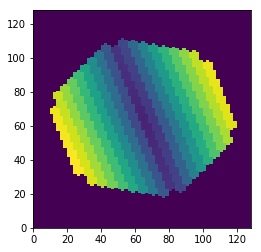

MSTN


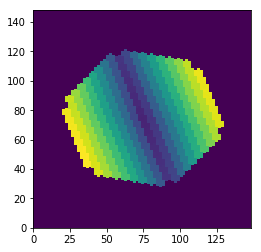

SST1


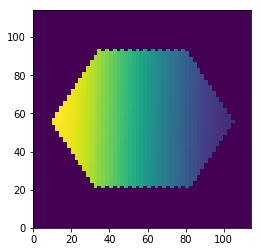

MSTF


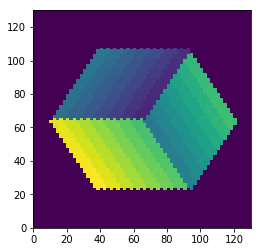

MSTS


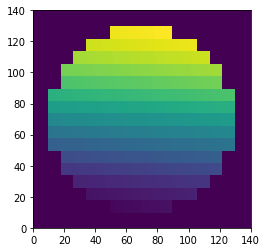

SSTC


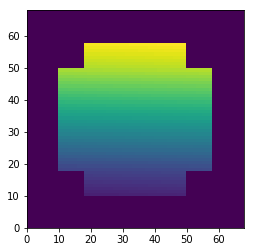

SSTA


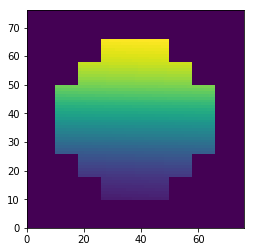

VTS


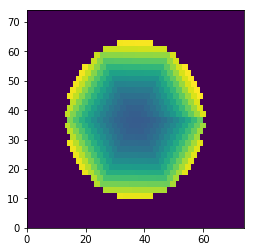

In [11]:
for tel_ in ['LST', 'MSTN', 'SST1', 'MSTF', 'MSTS', 'SSTC', 'SSTA', 'VTS']:
    print(tel_)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(test_im_dict[tel_][:,:,0],cmap='viridis')
    plt.savefig("{}_mapped.pdf".format(tel_))
    plt.show()



